In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_FC_PREP_0522.csv')

df.head()
df.info()
print(f'Dataset size: {df.shape}')

,POD,RATE
0,2005-07-19,2200.0
1,2005-07-20,2250.0
2,2005-07-21,2300.0
3,2005-07-22,2280.0
4,2005-07-23,2260.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POD     6375 non-null   object 
 1   RATE    6375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 99.7+ KB
Dataset size: (6375, 2)


In [79]:
df['POD'] = pd.to_datetime(df['POD'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6375 non-null   datetime64[ns]
 1   RATE    6375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.7 KB


In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Y is the target
Y = df.pop('RATE') 
X = df

# Normalise and split the data into training and testing sets
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


<h3>Improving Accuracy Scores<h3>

Tunning Random Forest </br>

<ol>
    <li>Grid search: To evaluate the performance of your model with different max_depth values. Train and evaluate your model with max_depth values ranging from 1 to 20 and select the one that gives you the best performance.</li>
    <li>Randomized search: Instead of trying every possible max_depth value, randomly sample a subset of values and evaluate the performance of your model with them.</li>
    <li>Out-of-bag (OOB) error: In a random forest model, each tree is trained on a subset of the data (known as the bootstrap sample) and uses the remaining data as out-of-bag (OOB) samples. Using OOB samples to estimate the performance of your model for different max_depth values.</li>
    <li>Visualization: Plot the performance of your model (e.g., accuracy or AUC) against different max_depth values to see if there is a clear maximum</li>
</ol>


In [81]:
from sklearn.ensemble import RandomForestRegressor
def train_ev_RFR(X_train, X_test, y_train, y_test):
    # Create an instance of the random forest regressor
    rf_regressor = RandomForestRegressor()

    # Train the model on the training data
    train_acc = []
    for i in range(50):
        rf_regressor.fit(X_train, y_train)
        y_pred = rf_regressor.predict(X_train)
        train_acc.append(r2_score(y_train, y_pred))

    # Evaluate the model on the testing data
    test_acc = []
    best_acc = float('-inf')
    best_iter = None
    for i in range(len(train_acc)):
        rf_regressor.fit(X_train, y_train)
        y_pred = rf_regressor.predict(X_test)
        acc = r2_score(y_test, y_pred)
        test_acc.append(acc)
        if acc > best_acc:
            best_acc = acc
            best_iter = i

    # Plot the training and testing accuracy as line graphs
    x_vals = range(len(train_acc))
    plt.plot(x_vals, train_acc, label='Training Accuracy')
    plt.plot(x_vals, test_acc, label='Testing Accuracy')
    plt.xlabel('Number of Training Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy of Random Forest Regressor')
    plt.legend()
    plt.show()

    print('Best Testing accuracy:', best_acc, 'at iteration', best_iter)
    # return train_acc, test_acc, best_acc, best_iter

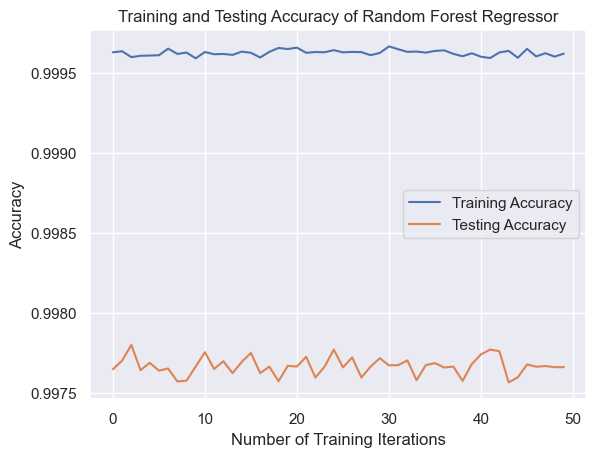

Best Testing accuracy: 0.9977989852316753 at iteration 2


In [82]:
train_ev_RFR(X_train, X_test, y_train, y_test)

Implement cross-validation: Instead of splitting the data into just a training and testing set, consider implementing a k-fold cross-validation technique to estimate the model's performance more accurately.

Hyperparameter tuning: Tune the hyperparameters to obtain better performance using grid search.

In [83]:
from sklearn.model_selection import cross_val_score, GridSearchCV

def train_evaluate_RFR(X_train, X_test, y_train, y_test):
    # Define the random forest regressor
    rf_regressor = RandomForestRegressor()

    # Define the hyperparameters to search over
    param_grid = {
        'n_estimators': [50, 100, 200, 500],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [3, 5, 7, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Perform a grid search over the hyperparameters using cross-validation
    grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters found by the grid search
    print('Best hyperparameters:', grid_search.best_params_)

    # Calculate the test accuracy of the model with the best hyperparameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    test_acc = np.mean(cross_val_score(best_model, X_test, y_test, cv=5))

    # Print the test accuracy
    print('Test accuracy:', test_acc)

    return best_model


In [84]:
best_model = train_evaluate_RFR(X_train, X_test, y_train, y_test)
print(best_model)
# best_depth = grid_search.best_params_['max_depth']
# best_est = grid_search.best_params_['n_estimators']
# print(best_depth,best_est)

c:\Users\it1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best hyperparameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


c:\Users\it1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\it1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\it1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

Test accuracy: 0.9893959989739567
RandomForestRegressor(max_depth=15, max_features='auto')


Grid search is a hyperparameter tuning technique used to find the best set of hyperparameters for a given machine learning model. The random forest regressor is a machine learning model that uses an ensemble of decision trees to make predictions.

During grid search for a random forest regressor, a grid of possible hyperparameter combinations is created, and the model is trained and evaluated using each combination. The hyperparameters that are typically tuned during grid search for a random forest regressor include:

n_estimators: the number of decision trees in the random forest
max_features: the maximum number of features considered for splitting a node
max_depth: the maximum depth of the decision trees in the random forest
min_samples_split: the minimum number of samples required to split an internal node
min_samples_leaf: the minimum number of samples required to be at a leaf node
For each combination of hyperparameters, the model is trained using the training data and evaluated using a validation set. The performance of the model is measured using a metric such as mean squared error (MSE) or R-squared (R2). The combination of hyperparameters that results in the best performance on the validation set is selected as the optimal set of hyperparameters for the random forest regressor.

In [85]:
# Attempt to use the hyperparameters to perform Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_rf(X_train, X_test, y_train, y_test, best_model):
    # Create a random forest regressor with the best hyperparameters
    rf = best_model
    
    # Fit the model on the entire training dataset
    rf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = rf.predict(X_test)
    
    # Calculate root mean square error, R-squared value, and accuracy
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mean = y_test.mean()
    acc = (1 - rmse/mean) * 100
    
    # Print the results
    print("Root mean squared error: {:.3f}".format(rmse))
    print("R-squared value: {:.3f}".format(r2))
    print("Accuracy: {:.2f}%".format(acc))

In [86]:
evaluate_rf(X_train, X_test, y_train, y_test, best_model)

c:\Users\it1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Root mean squared error: 99.588
R-squared value: 0.997
Accuracy: 93.78%


It seems like there is a decrease in performace on the test set, compared to default hyper parameters. This is because the default hyperparameters may have been chosen based on their good performance on a specific dataset or task, and so deviating too much from those defaults may not be beneficial in all cases.

That being said, the difference in performance between your tuned and untuned models is not very large, and it's possible that the improvement in the tuned model is not statistically significant.

Overall, the fact that the difference in performance between tuned and untuned models is relatively small suggests that it already have a good set of hyperparameters with the default values, and that further tuning may not be necessary or useful.